# SI模型

In [87]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

In [88]:
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False

In [89]:
# N为人群总数
N = 11000000
# β为传染率系数
beta = 0.25
# gamma为恢复率系数
gamma = 0
# I_0为感染者的初始人数
I_0 = 1
# S_0为易感者的初始人数
S_0 = N - I_0
# T为传播时间
T = 150

In [90]:
# INI为初始状态下的数组
INI = (S_0,I_0)

In [91]:
def funcSI(inivalue,_):
    Y = np.zeros(2)
    X = inivalue
    # 易感个体变化
    Y[0] = - (beta * X[0] * X[1]) / N + gamma * X[1]
    # 感染个体变化
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
    return Y

In [92]:
T_range = np.arange(0,T + 1)

In [93]:
RES = spi.odeint(funcSI,INI,T_range)

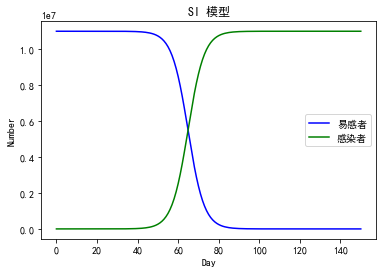

In [94]:
plt.plot(RES[:,0],color = 'blue',label = '易感者')
plt.plot(RES[:,1],color = 'green',label = '感染者')
plt.title('SI 模型')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

# SIS模型

In [95]:
# N为人群总数
N = 10000
# β为传染率系数
beta = 0.25
# gamma为恢复率系数
gamma = 0.05
# I_0为感染者的初始人数
I_0 = 1
# S_0为易感者的初始人数
S_0 = N - I_0
# T为传播时间
T = 150

In [96]:
INI = (S_0,I_0)

In [97]:
def funcSIS(inivalue,_):
 Y = np.zeros(2)
 X = inivalue
 # 易感个体变化
 Y[0] = - (beta * X[0]) / N * X[1] + gamma * X[1]
 # 感染个体变化
 Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
 return Y

In [98]:
T_range = np.arange(0,T + 1)

In [99]:
RES = spi.odeint(funcSIS,INI,T_range)

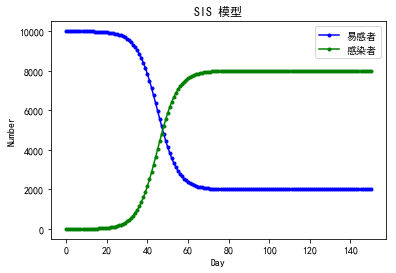

In [12]:
plt.plot(RES[:,0],color = 'blue',label = '易感者',marker = '.')
plt.plot(RES[:,1],color = 'green',label = '感染者',marker = '.')
plt.title('SIS 模型')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

# SIR模型

In [100]:
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return ([dS_dt, dI_dt, dR_dt])

In [101]:
# initialization
S0 = 0.9 # ratio
I0 = 0.1 # ratio
R0 = 0.0 # ratio
beta = 0.35
gamma = 0.1

In [102]:
# time vector
t = np.linspace(0, 100, 10000)
# result
res = scipy.integrate.odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
res = np.array(res)

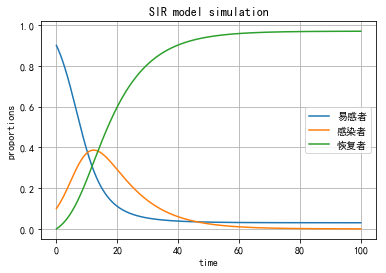

In [54]:
# plot
plt.figure(figsize=[6, 4])
plt.plot(t, res[:, 0], label='易感者')
plt.plot(t, res[:, 1], label='感染者')
plt.plot(t, res[:, 2], label='恢复者')
plt.legend()
plt.grid()
plt.xlabel('time')
plt.ylabel('proportions')
plt.title('SIR 模型')
plt.show()

# SEIR模型

In [37]:
def calc(T):
    for i in range(0,len(T)-1):
        S.append(S[i]-r*b*S[i]*I[i]/N)
        E.append(E[i]+r*b*S[i]*I[i]/N-a*E[i])
        I.append(I[i]+a*E[i]-y*I[i])
        R.append(R[i]+y*I[i])

In [38]:
def plot(T,E,I,S,R):
    plt.title('SEIR-病毒传播时间曲线图')
    plt.plot(T,S,color='r',label="易感者")
    plt.plot(T,E,color='k',label="潜伏者")
    plt.plot(T,I,color='b',label="传染者")
    plt.plot(T,R,color='g',label="康复者")
    plt.xlabel("时间（天）")
    plt.ylabel("人数")
    plt.grid(False)
    plt.legend()
    plt.show()

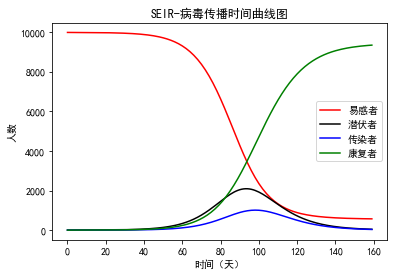

In [41]:
if __name__ == "__main__":
    N = 10000   #总人数
    E = [0]   #潜伏者的初始人数
    I = [1]   #感染者的初始人数
    S = [N-I[0]]   #易感者的初始人数
    R = [0]    #治愈者的初始人数
    r = 20  #传染者接触人数
    #传染率系数
    b = 0.03    #传染概率
    a = 0.1     #潜伏者患病概率
    y = 0.2     #治愈率
    T = range(0,160)  #传播时间
    calc(T)
    plot(T,E,I,S,R)

# SEITR模型

In [103]:
# N为人群总数
N =11000000
# β为传染率系数
beta = 0.18
# gamma为恢复率系数
gamma = 0
#δ为受到治疗系数
δ = 0.14
# Te为疾病潜伏期
Te = 5
# I_0为感染未住院的初始人数
I_0 = 0
# E_0为潜伏者的初始人数
E_0 = 1
# R_0为治愈者的初始人数
R_0 = 0
#T_0为治疗中的初始人数
T_0 = 0
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0 - T_0
# T为传播时间
T = 45

In [118]:
# INI为初始状态下的数组
INI = (S_0,E_0,I_0,R_0,T_0)

In [119]:
def funcSEIR(inivalue,_):
 Y = np.zeros(5)
 X = inivalue
 # 易感个体变化
 Y[0] = - (beta * X[0] *( X[2]+X[1])) / N
 # 潜伏个体变化
 Y[1] = (beta * X[0] *( X[2]+X[1])) / N - X[1] / Te
 # 感染未住院
 Y[2] = X[1] / Te - δ * X[2]
 # 治愈个体变化
 Y[3] = gamma * X[4]
 #治疗中个体变化
 Y[4] = δ* X[2] - gamma* X[4]
 return Y

In [124]:
T_range = np.arange(0,T + 1)

In [125]:
RES = spi.odeint(funcSEIR,INI,T_range)

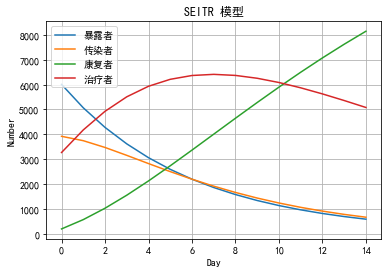

In [126]:
plt.figure(figsize=[6, 4])
#plt.plot(RES[:,0],label = '易感者')
plt.plot(RES[:,1],label = '暴露者')
plt.plot(RES[:,2],label = '传染者')
plt.plot(RES[:,3],label = '康复者')
plt.plot(RES[:,4],label = '治疗者')

plt.title('SEITR 模型')
plt.legend()
plt.grid()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

# 第一阶段

In [111]:
# N为人群总数
N =11000000
# β为传染率系数
beta = 0.18
# gamma为恢复率系数
gamma = 0
#δ为受到治疗系数
δ = 0.14
# Te为疾病潜伏期
Te = 5
# I_0为感染未住院的初始人数
I_0 = 0
# E_0为潜伏者的初始人数
E_0 = 1
# R_0为治愈者的初始人数
R_0 = 0
#T_0为治疗中的初始人数
T_0 = 0
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0 - T_0
# T为传播时间
T = 45

# 第二阶段

In [112]:
# N为人群总数
N =11000000
# β为传染率系数
beta = 0.22
# gamma为恢复率系数
gamma = 0.01
#δ为受到治疗系数
δ = 0.14
# Te为疾病潜伏期
Te = 5
# I_0为感染未住院的初始人数
I_0 = 102
# E_0为潜伏者的初始人数
E_0 = 132
# R_0为治愈者的初始人数
R_0 = 0
#T_0为治疗中的初始人数
T_0 = 122
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0 - T_0
# T为传播时间
T = 45

# 第三阶段

In [117]:
# N为人群总数
N =11000000
# β为传染率系数
beta = 0.176
# gamma为恢复率系数
gamma = 0.02
#δ为受到治疗系数
δ = 0.83
# Te为疾病潜伏期
Te = 5
# I_0为感染未住院的初始人数
I_0 = 3921
# E_0为潜伏者的初始人数
E_0 = 6004
# R_0为治愈者的初始人数
R_0 = 204
#T_0为治疗中的初始人数
T_0 = 3271
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0 - T_0
# T为传播时间
T = 14

# 第四阶段

In [123]:
# N为人群总数
N =11000000
# β为传染率系数
beta = 0.0176
# gamma为恢复率系数
gamma = 0.1
#δ为受到治疗系数
δ = 0.333
# Te为疾病潜伏期
Te = 5
# I_0为感染未住院的初始人数
I_0 = 18710
# E_0为潜伏者的初始人数
E_0 = 20614
# R_0为治愈者的初始人数
R_0 = 1389
#T_0为治疗中的初始人数
T_0 = 10331
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0 - T_0
# T为传播时间
T = 14